<a href="https://colab.research.google.com/github/G31R6T/LIZHIPENG/blob/master/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os



In [2]:
current_directory = os.getcwd()
print(f"Current working directory: {current_directory}")


Current working directory: /content


In [3]:
# Code Cell 1
!apt-get update
!apt-get -y install sqlite3

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ Packages [77.6 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:6 http://archive.ubuntu.com/ubuntu focal InRelease
Get:7 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:11 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:12 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3,150 kB]
Hit:13 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:14 http://archive.

In [4]:
# Code Cell 2
#Create the InternetSpeed database
!sqlite3 /content/sample_data/InternetSpeed.db ".databases"   

main: /content/sample_data/InternetSpeed.db


In [5]:
# Code Cell 3
#Installing csvkit
!pip install csvkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.7 MB/s eta 0:00:00
  Created wheel for olefile: filename=olefile-0.46-py2.py3-none-any.whl size=35432 sha256=437ac9c93f28bbd005664f4c5ba8381dca8a60b77e688ab625120347a554aa66
  Stored in directory: /root/.cache/pip/wheels/02/39/c0/9eb1f7a42b4b38f6f333b6314d4ed11c46f12a0f7b78194f0d
Successfully built olefile
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.10
    U

In [6]:
# Code Cell 4
# Removing database if already existing
!test -e InternetSpeed.db && rm InternetSpeed.db
# Importing the LA_wifi_speed_UK.csv file into a sql database file InternetSpeed.db
!csvsql --db sqlite:///InternetSpeed.db --insert /content/sample_data/LA_wifi_speed_UK.csv
# This will take a while 

/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:121: DeprecationWarning: pkg_resources is deprecated as an API
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_nam

In [7]:
# Code Cell 5
# this is the library to talk to the database
import sqlite3
import pandas as pd
# this is a library for data visualization
from matplotlib import pyplot as plt
# this is to say that we want our plots to be part of this page, and not opened in a new window
%matplotlib inline

In [8]:
# Code Cell 6
# what is the name of the database you want to connect to?
# conn = sqlite3.connect(??)
#SOLUTION:
conn = sqlite3.connect('InternetSpeed.db')
cur = conn.cursor()

In [9]:
# Code Cell 7
# complete the query with the field you want to select, the table you want to select the field from,
# and the field you want your results to be ordered by
#query = 'SELECT ? FROM ? ORDER BY ? LIMIT ?;'

# SOLUTION:
query = 'SELECT DateTime FROM LA_wifi_speed_UK ORDER BY DateTime LIMIT 10;'

cur.execute(query)

In [10]:
# Code Cell 8
for row in cur:
    print(row) 

('2016-11-23 00:00:00.000000',)
('2016-11-23 00:30:00.000000',)
('2016-11-23 01:00:00.000000',)
('2016-11-23 01:30:00.000000',)
('2016-11-23 02:00:00.000000',)
('2016-11-23 02:30:00.000000',)
('2016-11-23 03:00:00.000000',)
('2016-11-23 03:30:00.000000',)
('2016-11-23 04:00:00.000000',)
('2016-11-23 04:30:00.000000',)


In [11]:
# Code Cell 9
query = 'SELECT DateTime FROM LA_wifi_speed_UK ORDER BY RANDOM() LIMIT 10'
cur.execute(query)

for row in cur:
    print(row) 

('2016-12-01 12:00:00.000000',)
('2016-11-25 02:00:00.000000',)
('2016-12-08 15:30:00.000000',)
('2016-12-05 13:00:00.000000',)
('2016-12-08 09:30:00.000000',)
('2016-12-05 19:30:00.000000',)
('2016-11-25 06:30:00.000000',)
('2016-12-05 11:00:00.000000',)
('2016-12-07 05:30:00.000000',)
('2016-12-12 10:30:00.000000',)


In [12]:
# Code Cell 10
# we need to have a cursor pointing to a table for this operation
query = 'SELECT * FROM LA_wifi_speed_UK LIMIT 1'
cur.execute(query)

In [13]:
# Code Cell 11
#visualizing the first 10 rows of the field description
cur.description[:10]

(('E07000223_p', None, None, None, None, None, None),
 ('E07000026_p', None, None, None, None, None, None),
 ('E07000032_p', None, None, None, None, None, None),
 ('E07000224_p', None, None, None, None, None, None),
 ('E07000170_p', None, None, None, None, None, None),
 ('E07000105_p', None, None, None, None, None, None),
 ('E07000004_p', None, None, None, None, None, None),
 ('E07000200_p', None, None, None, None, None, None),
 ('E09000002_p', None, None, None, None, None, None),
 ('E09000003_p', None, None, None, None, None, None))

In [14]:
# Code Cell 12
# loop over the header and store them in a list
columns = [member[0] for member in cur.description]

# ignore index column
columns = columns[1:]

In [15]:
# Code Cell 13
# remove suffix '_p'
columns = [c.replace('_p', '') for c in columns]
# remove suffix '_d'
columns = [c.replace('_d', '') for c in columns]
# remove suffix '_u'
# columns = ??

# SOLUTION:
columns = [c.replace('_u', '') for c in columns]
    
# this operation is to remove duplicates
columns = list(set(columns))

In [16]:
# Code Cell 14
# visualize the first 10 areas
columns[:10]

['E07000173',
 'E06000038',
 'E06000045',
 'E08000032',
 'E07000192',
 'E08000011',
 'E07000235',
 'E07000215',
 'E07000136',
 'E09000021']

In [17]:
# Code Cell 15
area = columns[0]
print(area) 

E07000173


In [18]:
# Code Cell 16
suffix = {'_p':'ping', '_d':'download', '_u':'upload'}
# we have the suffixes as the keys of the dictionary
print(suffix.keys())

# we have the complete names as the values of the dictionary
print(suffix.values())

dict_keys(['_p', '_d', '_u'])
dict_values(['ping', 'download', 'upload'])


Text(0.5, 1.0, 'E07000173')

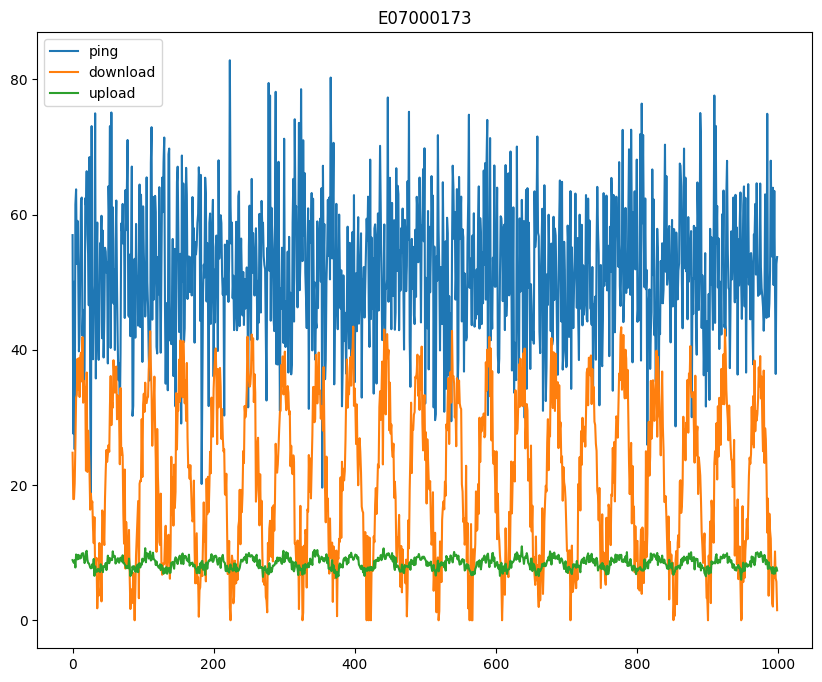

In [19]:
# Code Cell 17
area = columns[0]
plt.figure(figsize=(10, 8))

# Plot each variable in suffix.keys() for each area
for s in suffix.keys():
    # query = ??
    # SOLUTION:
    query = 'SELECT "{}{}" FROM LA_wifi_speed_UK ORDER BY DateTime'.format(area, s)
    cur.execute(query)
    plt.plot(cur.fetchall(), label=suffix[s])
plt.legend()
plt.title(area)

In [20]:
# Code Cell 18
#new_columns = ?
#df = pd.DataFrame(columns = ?)

# SOLUTION:
new_columns = ['Area', 'Average_p', 'Average_d', 'Average_u']
df = pd.DataFrame(columns = new_columns)

In [21]:
# Code Cell 19
# this will take a while...
for i in range(len(columns)-1): #EDL : replace xrange with range
    tmp_list = []
    tmp_list.append(columns[i])
    for s in suffix.keys():
        # query = ??
        # SOLUTION:
        query = 'SELECT AVG("{}{}") FROM LA_wifi_speed_UK'.format(columns[i], s)
        
        cur.execute(query)
        
        mean = cur.fetchone()
        tmp_list.append(mean[0])
    #append the columns to the empty DataFrame
    df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
# visualize the head of the dataframe here
# SOLUTION:
df.head()

<ipython-input-21-00cc6b3bd79e>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
<ipython-input-21-00cc6b3bd79e>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
<ipython-input-21-00cc6b3bd79e>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
<ipython-input-21-00cc6b3bd79e>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
<ipython-input-21-00

,Area,Average_p,Average_d,Average_u
0,E07000173,51.776644,21.089611,8.443025
1,E06000038,53.176756,21.321161,8.574166
2,E06000045,53.894639,22.458597,8.856190
3,E08000032,60.068885,24.982134,9.982742
4,E07000192,52.211869,20.804882,8.344268


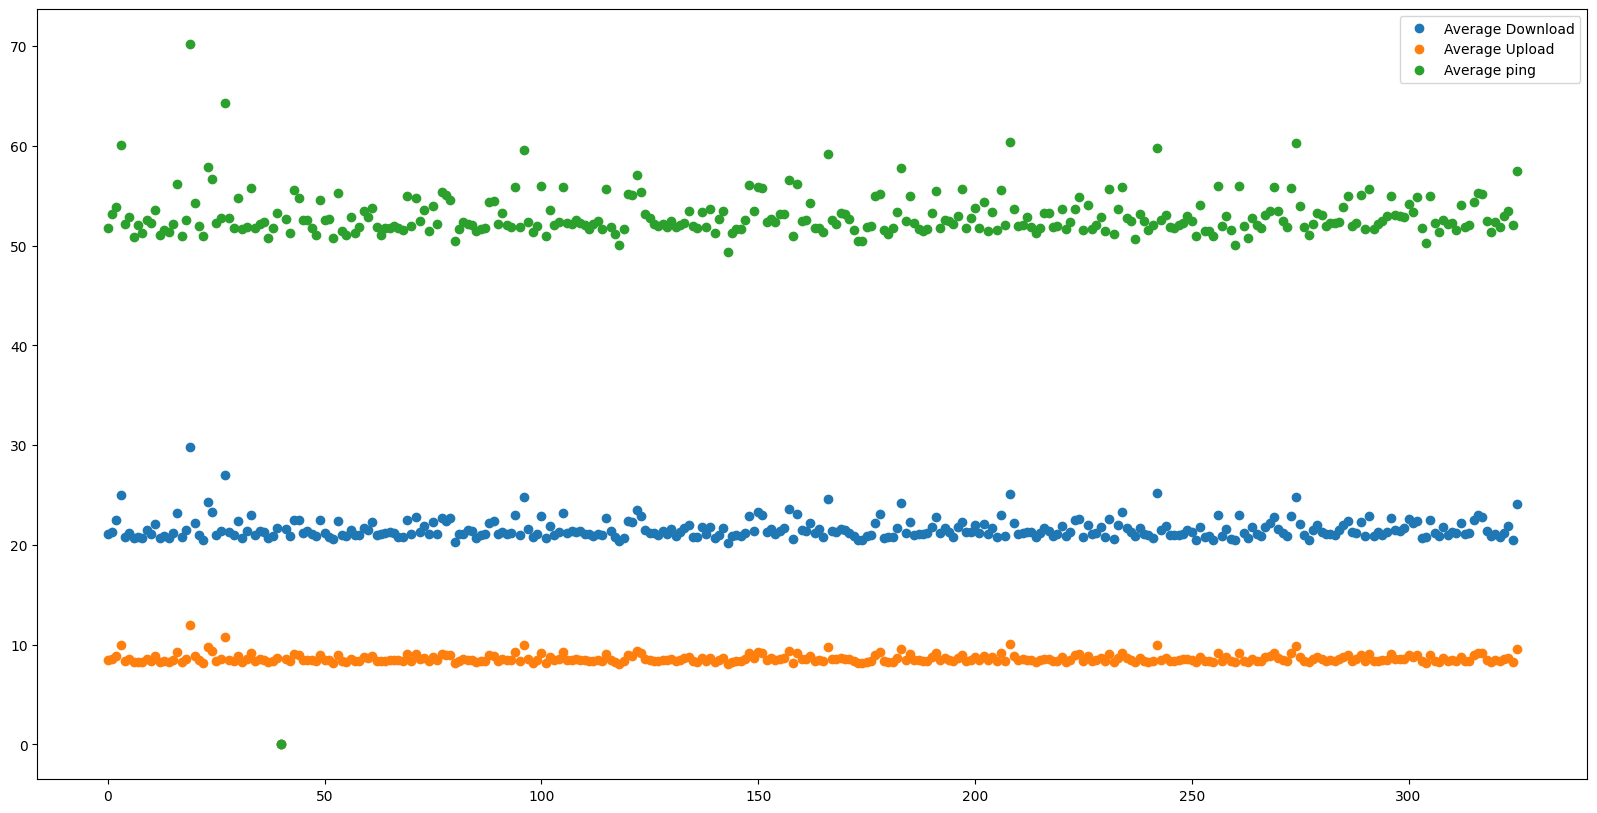

In [22]:
# Code Cell 20
plt.figure(figsize=(20,10))
plt.plot(df.index, df[['Average_d','Average_u','Average_p']], 'o')
plt.legend(['Average Download', 'Average Upload', 'Average ping'])

In [23]:
# Code Cell 21
# Make sure to drop the table first if it already exists
try:
    cur.execute('DROP TABLE average_speed')
except:
    pass

# what is the name of the table you want to save? To what connection?
# Save the dataframe table into a SQL table
# df.to_sql(?,?)

# SOLUTION:
df.to_sql('average_speed', conn)

326

In [24]:
# Code Cell 22
# just checking everything worked fine: select everything from the table we just created
# and then print the first two rows of the result

query_2 = 'SELECT * FROM average_speed'
cur.execute(query_2)

# print the first fetched record
print(cur.fetchone())
# print the next fetched record
print(cur.fetchone())

(0, 'E07000173', 51.776644192240006, 21.08961095204236, 8.443024729688117)
(1, 'E06000038', 53.17675610838584, 21.3211612013836, 8.574166342995248)


In [25]:
# Code Cell 23
#first close the database file, otherwise the external csvsql command cannot use
conn.close()

In [26]:
# Code Cell 24
# use the external csvsql command to add to the DB file data from the CSV file
#!csvsql --db sqlite:///...

#SOLUTION:
!csvsql --db sqlite:///InternetSpeed.db --insert ./Data/LA_population.csv

/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:121: DeprecationWarning: pkg_resources is deprecated as an API
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_nam

In [35]:
# Code Cell 25
#reopen the DB file
#conn = sqlite3.connect(...)

# SOLUTION:
conn = sqlite3.connect('InternetSpeed.db')
cur = conn.cursor()

In [ ]:
# Code Cell 26
#query = ?
# SOLUTION:
query = 'SELECT * FROM LA_population LIMIT 10'

#cur.execute(?)
# SOLUTION:
cur.execute(query)

for row in cur:
    # print the first fetched record
    # SOLUTION:
    print(row)

In [36]:
# Code Cell 27
query = 'SELECT * FROM average_speed JOIN LA_population ON LA_population."LA_code"=average_speed.Area'

cur.execute(query)
k = 0
for row in cur:
    if k>10:
        break
    #print ?
    
    # SOLUTION:
    print(row)
    
    k+=1

OperationalError: ignored